Project Name: CAR PRICE PREDICTION WITH MACHINE LEARNIING

Submitted to: OASIS-INFOBYTE

Project By: Suhana Rauthar

DATA ANALYSTICS INTERNSHIP TASK 3

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [14]:
data = pd.read_csv('/content/car_data.csv')
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [15]:
#checking number of rows and columns
data.shape

(4340, 8)

In [16]:
#getting some information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [17]:
#getting statistical measures of the data
data.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [18]:
print(data['seller_type'].unique())
print(data['transmission'].unique())
print(data['owner'].unique())

['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


In [19]:
#checking for number of missing values
data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [69]:
#checking distribution of categorical data
print(data.fuel.value_counts())
print(data.seller_type.value_counts())
print(data.transmission.value_counts())
print(data.owner.value_counts())

1    1800
0    1717
2      37
3      22
4       1
Name: fuel, dtype: int64
1    2832
0     712
2      33
Name: seller_type, dtype: int64
0    3265
1     312
Name: transmission, dtype: int64
First Owner             2218
Second Owner             978
Third Owner              289
Fourth & Above Owner      75
Test Drive Car            17
Name: owner, dtype: int64


In [23]:
#getting duplicate values
data.duplicated().sum()

763

In [24]:
data.drop_duplicates(inplace= True)

In [26]:
#converting the dtype of year
data["year"]= pd.to_datetime(data["year"], format = '%Y').dt.year

In [28]:
#getting unique values in the column 'Year'
data["year"].unique()

array([2007, 2012, 2017, 2014, 2016, 2015, 2018, 2019, 2013, 2011, 2010,
       2009, 2006, 1996, 2005, 2008, 2004, 1998, 2003, 2002, 2020, 2000,
       1999, 2001, 1995, 1997, 1992])

In [29]:
#getting the number of unique values in the column 'Year'
data["year"].nunique()

27

ENCODING THE CATEGORICAL DATA

In [91]:
data.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2,'LPG':3, 'Electric':4}},inplace=True)
data.replace({'seller_type':{'Dealer':0,'Individual':1,'Trustmark Dealer':2}},inplace=True)
data.replace({'transmission':{'Manual':0,'Automatic':1,}},inplace=True)
data.replace({'owner':{'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4}},inplace=True)

In [92]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,1,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,1,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,0,0
3,Datsun RediGO T Option,2017,250000,46000,0,1,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,0,1


In [93]:
data.corr()

<ipython-input-93-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,year,selling_price,km_driven,fuel,seller_type,transmission,owner
year,1.000000,0.424260,-0.417490,0.082074,-0.119385,0.116692,-0.405142
selling_price,0.424260,1.000000,-0.187359,0.214007,-0.153182,0.486269,-0.201091
km_driven,-0.417490,-0.187359,1.000000,0.280836,0.115357,-0.101387,0.264860
fuel,0.082074,0.214007,0.280836,1.000000,-0.023001,0.007907,0.014431
seller_type,-0.119385,-0.153182,0.115357,-0.023001,1.000000,-0.125991,0.142434
transmission,0.116692,0.486269,-0.101387,0.007907,-0.125991,1.000000,-0.065911
owner,-0.405142,-0.201091,0.264860,0.014431,0.142434,-0.065911,1.000000


<ipython-input-94-d6597c11c35e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot= True, cmap= 'Reds')


<Axes: >

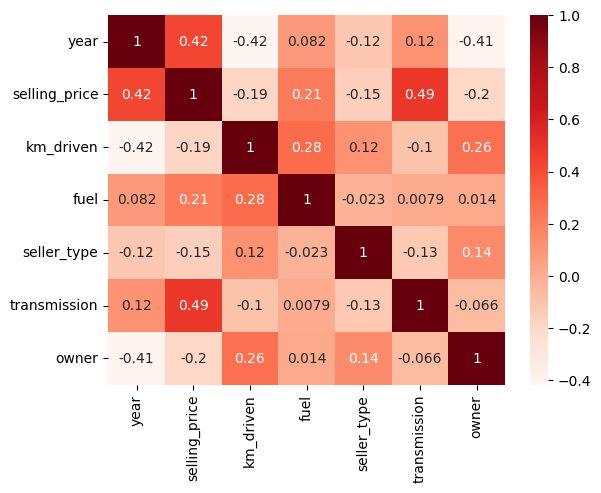

In [94]:
#correlation between columns
sns.heatmap(data.corr(), annot= True, cmap= 'Reds')

Splitting Data and Target

In [95]:
X = data.drop(['name','selling_price'],axis=1)
Y = data['selling_price']

In [96]:
print(X)

      year  km_driven  fuel  seller_type  transmission  owner
0     2007      70000     0            1             0      0
1     2007      50000     0            1             0      0
2     2012     100000     1            1             0      0
3     2017      46000     0            1             0      0
4     2014     141000     1            1             0      1
...    ...        ...   ...          ...           ...    ...
4335  2014      80000     1            1             0      1
4336  2014      80000     1            1             0      1
4337  2009      83000     0            1             0      1
4338  2016      90000     1            1             0      0
4339  2016      40000     0            1             0      0

[3577 rows x 6 columns]


In [97]:
print(Y)

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 3577, dtype: int64


In [98]:
X['owner'].unique()

array([0, 1, 3, 2, 4])

Splitting Training and Test data

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=5)

MODEL TRAINING

In [100]:
model = LinearRegression()

In [101]:
model.fit(X_train, Y_train)

LinearRegression()

MODEL EVALUATION

In [104]:
#prediction on Training data
training_data_prediction = model.predict(X_train)

Visualize the Actual prices and Predicted prices

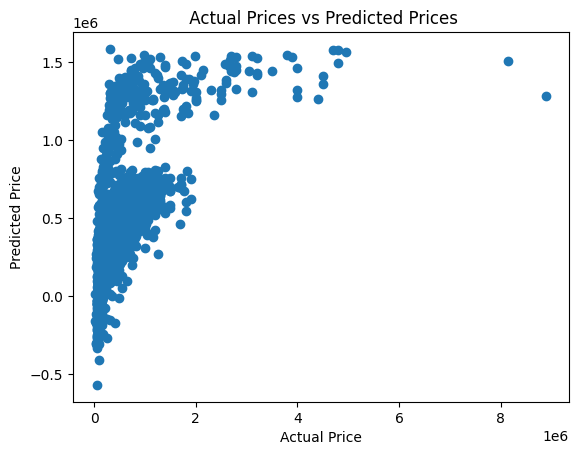

In [106]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [107]:
#prediction on Testing data
test_data_prediction = model.predict(X_test)

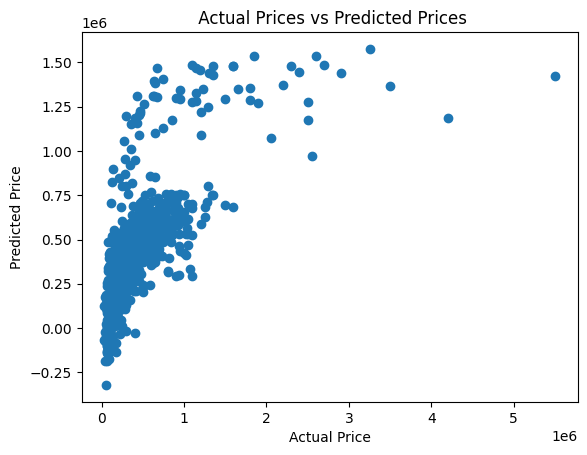

In [111]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [112]:
lass_reg_model = Lasso()

In [113]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

MODEL EVALUATION

In [114]:
#prediction on Training data
training_data_prediction = lass_reg_model.predict(X_train)

Visualize the Actual prices and Predicted prices

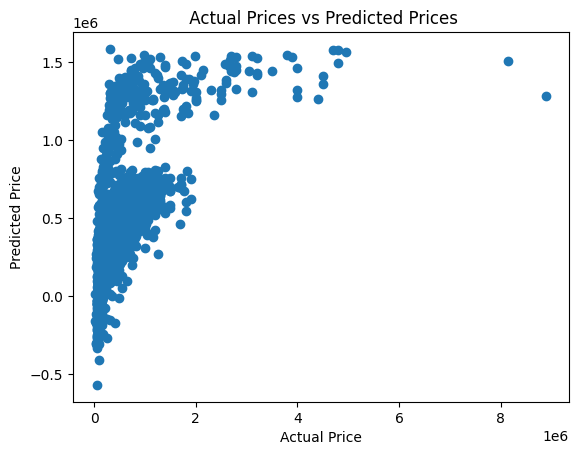

In [117]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [118]:
#prediction on Testing data
test_data_prediction = lass_reg_model.predict(X_test)

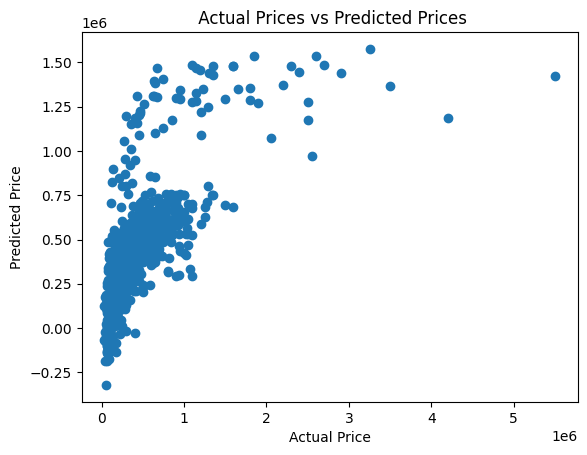

In [120]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()